SAI RAINA
USC ID = 4650068238
Github Username = saitiger

In [1]:
# Dependencies 
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from scipy.io import arff
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from tabulate import tabulate
from sklearn.model_selection import learning_curve

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# 1 (A)

In [2]:
dt = arff.loadarff(r'.\vertebral_column_data\column_2C_weka.arff')
df = pd.DataFrame(dt[0])
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,b'Abnormal'
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,b'Abnormal'
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,b'Abnormal'
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,b'Abnormal'
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,b'Abnormal'


# 1 (B)

Encoding Target Variable Normal = 1 Abnormal = 0
--> Used replace because label encoding assigns value based on alphabetical order of target variable 'class' 
due to which abnormal is set as 1 instead of 0.

In [3]:
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

In [4]:
df['class']=df['class'].replace(to_replace=1,value=3)

In [5]:
df['class']=df['class'].replace(to_replace=0,value=2)

In [6]:
df['class']=df['class'].replace(to_replace=3,value=0)

In [7]:
df['class']=df['class'].replace(to_replace=2,value=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt               310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int32  
dtypes: float64(6), int32(1)
memory usage: 15.9 KB


In [9]:
df.columns

Index(['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle',
       'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis', 'class'],
      dtype='object')

Prepossing and EDA

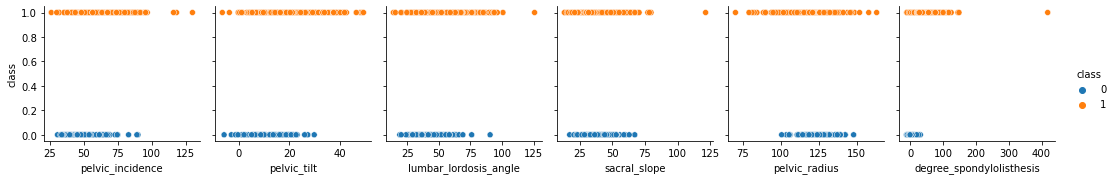

In [10]:
x1 = df.iloc[:, :-1]
y1 = df.iloc[:,-1]
sns.pairplot(data = df,x_vars=x1,y_vars='class',hue='class')

# 1 (B) (i)

Text(0.5, 1.01, 'Independent Variable Pairplot')

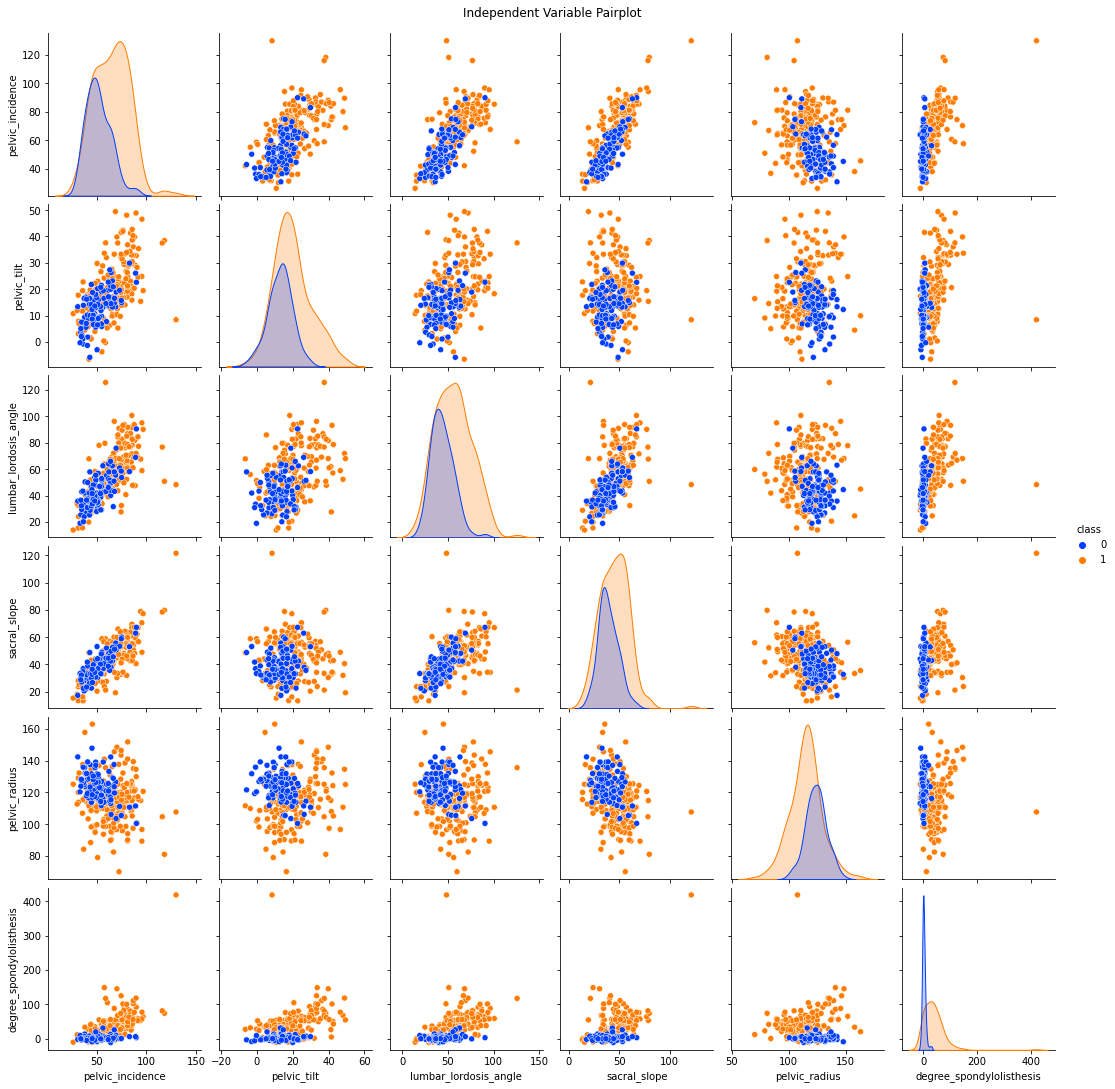

In [11]:
pp = sns.pairplot(df,hue='class',palette='bright')
pp.fig.suptitle("Independent Variable Pairplot", y = 1.01)

# 1 (B) (ii)

<AxesSubplot:xlabel='class', ylabel='degree_spondylolisthesis'>

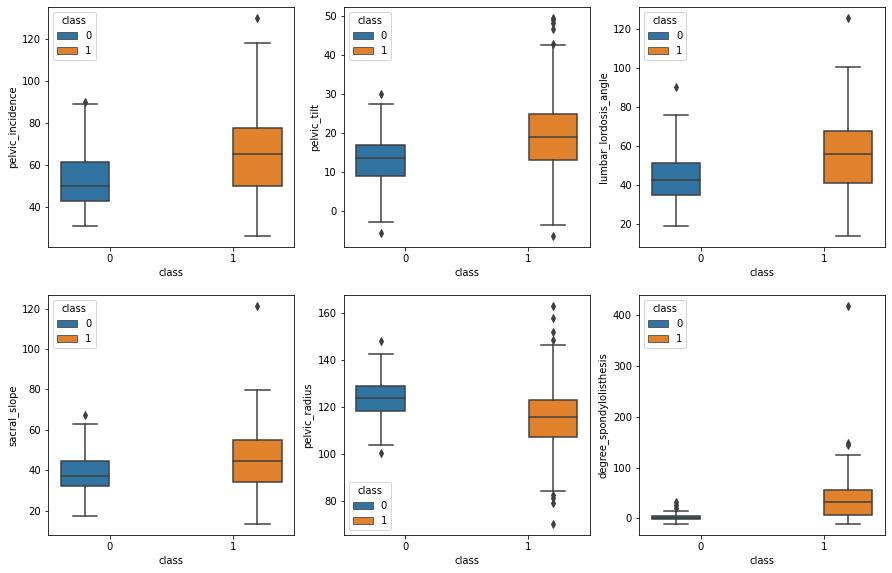

In [12]:
# print(df.columns)
# x_var = []
# for x in x1 :
#     x_var.append(x)

plt.figure(figsize=(15,15))
plt.subplot(3,3,1)
sns.boxplot(data = df, x = 'class', y ='pelvic_incidence' ,hue='class')
plt.subplot(3,3,2)
sns.boxplot(data = df, x = 'class', y ='pelvic_tilt' ,hue='class')
plt.subplot(3,3,3)
sns.boxplot(data = df, x = 'class', y ='lumbar_lordosis_angle' ,hue='class')
plt.subplot(3,3,4)
sns.boxplot(data = df, x = 'class', y ='sacral_slope' ,hue='class')
plt.subplot(3,3,5)
sns.boxplot(data = df, x = 'class', y ='pelvic_radius' ,hue='class')
plt.subplot(3,3,6)
sns.boxplot(data = df, x = 'class', y ='degree_spondylolisthesis' ,hue='class')

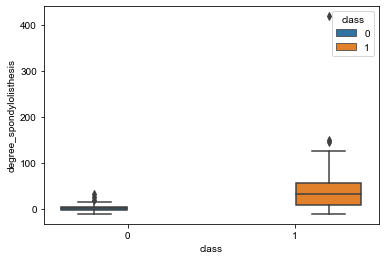

In [13]:
# Plotting boxplot for column degree_spondylolisthesis in a bigger window to get a better idea of the distribution of data.
sns.boxplot(data = df, x = 'class', y ='degree_spondylolisthesis' ,hue='class')
sns.set(rc={'figure.figsize':(15,20)})

# 1 (B) (iii)

In [14]:
# Training 
# Class 1 --> 140 
# Class 0 --> 70 

train_1 = df[0:140]
train_2 = df[210:280]
Train_ls = [train_1,train_2]
Train = pd.concat(Train_ls)
x_train = Train.iloc[:,:-1]
y_train = Train.iloc[:,-1]

# Test 
test_1 = df[140:210]
test_2 = df[280::]
Test_ls = [test_1,test_2]
Test = pd.concat(Test_ls)
x_test = Test.iloc[:,:-1]
y_test = Test.iloc[:,-1]

# 1 (C) (i)

In [15]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(x_train,y_train)
prediction = knn.predict(x_test)

print("Confusion Matrix : \n",confusion_matrix(y_test,prediction))

Confusion Matrix : 
 [[20 10]
 [ 0 70]]


# 1 (C) (ii)

In [16]:
err_rate = []

for i in range(208,0,-3): 
    knn_1 = KNeighborsClassifier(n_neighbors = i)
    knn_1.fit(x_train,y_train)
    y_pred = knn_1.predict(x_train)
    sc = accuracy_score(y_train,y_pred)  
    err_rate.append(1-sc)
print(err_rate)
print("Minimum Error Rate : ",min(err_rate)) # The minimum training error rate that is obtained in this homework

[0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.33333333333333337, 0.30952380952380953, 0.29047619047619044, 0.24761904761904763, 0.24761904761904763, 0.2142857142857143, 0.2142857142857143, 0.18571428571428572, 0.20952380952380956, 0.16666666666666663, 0.17142857142857137, 0.1523809523809524, 0.15714285714285714, 0.17619047619047623, 0.1523809523809524, 0.15714285714285714, 0.16666666666666663, 0.17619047619047623, 0.17142857142857137, 0.18095238095238098, 0.18571428571428572, 0.17619047619047623, 0.16666666666666663, 0.16190476190476188, 0.16666666666666

Text(0, 0.5, 'Error Rate')

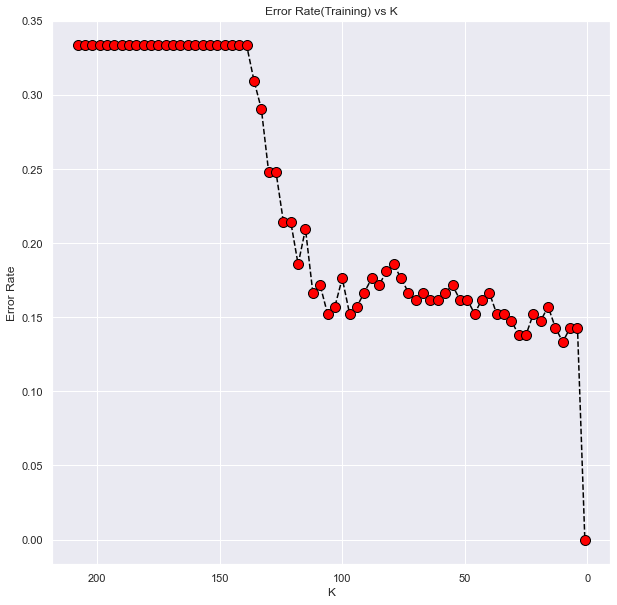

In [17]:
# TRAIN ERROR RATE 
plt.figure(figsize=(10,10))
plt.plot(range(208,0,-3),err_rate,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
# plt.plot(range(208,0,-3),err_rate_test,color='blue', linestyle='dashed', marker='o',
#          markerfacecolor='green', markersize=10,label="Test Error Rate")
plt.title('Error Rate(Training) vs K')
plt.xlabel('K')
plt.gca().invert_xaxis()
plt.ylabel('Error Rate')

In [18]:
err_rate_test = []

for i in range(208,0,-3): 
    knn_2 = KNeighborsClassifier(n_neighbors = i)
    knn_2.fit(x_train,y_train)
    y_pred = knn_2.predict(x_test)
    sc_test = accuracy_score(y_test,y_pred)  
    err_rate_test.append(1-sc_test)
print(err_rate_test)
print(min(err_rate_test))

[0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.28, 0.27, 0.24, 0.22999999999999998, 0.19999999999999996, 0.21999999999999997, 0.15000000000000002, 0.19999999999999996, 0.16000000000000003, 0.16000000000000003, 0.15000000000000002, 0.18000000000000005, 0.14, 0.16000000000000003, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.16000000000000003, 0.14, 0.13, 0.12, 0.13, 0.12, 0.13, 0.12, 0.12, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 

Text(0, 0.5, 'Error Rate')

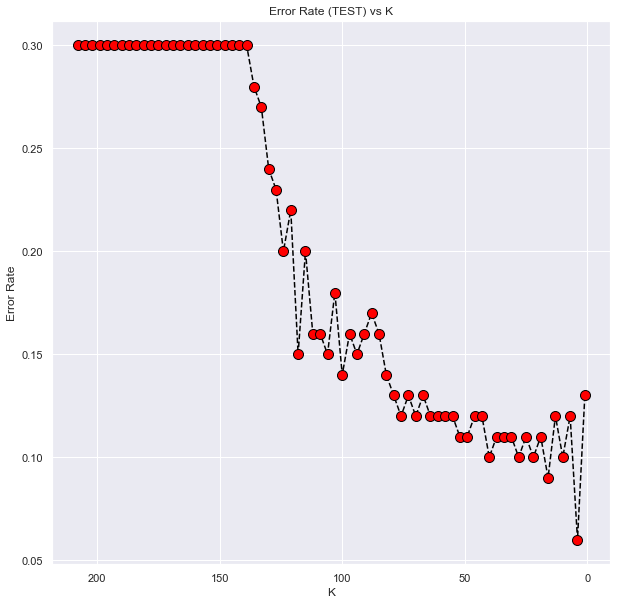

In [19]:
plt.figure(figsize=(10,10))
plt.plot(range(208,0,-3),err_rate_test,color='black', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate (TEST) vs K')
plt.xlabel('K')
plt.gca().invert_xaxis()
plt.ylabel('Error Rate')

k = 16 is the optimal value as it has the minimum test error and performs decently in training error as well. Though k = 4 has the lowest testing accuracy score it has a higher error(training) rate meaning it could be overfitting which is validated by the testing error rate which increases and then decreases.

In [20]:
knn_3 = KNeighborsClassifier(n_neighbors = 16,metric = 'euclidean')
knn_3.fit(x_train,y_train)
prediction_3 = knn_3.predict(x_test)

In [21]:
# Precision, Recall, F1- score are mentioned in classification report 
# True Poisitive and False Positive rate is calculated from confusion matrix
print("Classification Report  : \n" ,classification_report(y_test,prediction_3))

cnf_matrix = confusion_matrix(y_test, prediction_3)


FP = cnf_matrix.sum(axis=0) - np.diag(cnf_matrix)  
FN = cnf_matrix.sum(axis=1) - np.diag(cnf_matrix)
TP = np.diag(cnf_matrix)
TN = cnf_matrix.sum() - (FP + FN + TP)

TPR = TP/(TP+FN)
TNR = TN/(FP+TN)

print("True Positive Rate : \n 0 \t \t 1 \n",TPR)
print("True Negative Rate :\n 0 \t \t 1 \n",TNR)

Classification Report  : 
               precision    recall  f1-score   support

           0       1.00      0.70      0.82        30
           1       0.89      1.00      0.94        70

    accuracy                           0.91       100
   macro avg       0.94      0.85      0.88       100
weighted avg       0.92      0.91      0.90       100

True Positive Rate : 
 0 	 	 1 
 [0.7 1. ]
True Negative Rate :
 0 	 	 1 
 [1.  0.7]


In [22]:
print("Confusion Matrix : \n",confusion_matrix(y_test,prediction_3))

Confusion Matrix : 
 [[21  9]
 [ 0 70]]


# 1 (D) 

In [23]:
err_rate_test_mink = []

for i in range(1,197,5): 
    knn_4 = KNeighborsClassifier(n_neighbors=i,metric = 'minkowski')
    knn_4.fit(x_train,y_train)
    prediction_4 = knn_4.predict(x_test)
    sc_test_mink = accuracy_score(y_test,prediction_4)  
    err_rate_test_mink.append(1-sc_test_mink)
#     print(i,1-sc_test)
print(err_rate_test_mink)
print("Minimum Error Rate : ",min(err_rate_test_mink)) # at k = 4

[0.13, 0.07999999999999996, 0.12, 0.08999999999999997, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.10999999999999999, 0.12, 0.12, 0.13, 0.13, 0.12, 0.13, 0.16000000000000003, 0.16000000000000003, 0.15000000000000002, 0.17000000000000004, 0.15000000000000002, 0.17000000000000004, 0.18000000000000005, 0.21999999999999997, 0.20999999999999996, 0.26, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
Minimum Error Rate :  0.07999999999999996


In [24]:
err_rate_test_manh = []

for i in range(1,197,5):
    knn_5 = KNeighborsClassifier(n_neighbors=i,metric = 'minkowski',p=1)
    knn_5.fit(x_train,y_train)
    prediction_5 = knn_5.predict(x_test)
    sc_test_manh = accuracy_score(y_test,prediction_5)  
    err_rate_test_manh.append(1-sc_test_manh)
#     print(i,1-sc_test)
print(err_rate_test_manh)
least_error_manh = min(err_rate_test_manh) # at k = 1,6,11 
print("Minimum Error", least_error_manh)

[0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.12, 0.13, 0.13, 0.13, 0.14, 0.13, 0.15000000000000002, 0.15000000000000002, 0.14, 0.14, 0.16000000000000003, 0.15000000000000002, 0.19999999999999996, 0.19999999999999996, 0.21999999999999997, 0.20999999999999996, 0.22999999999999998, 0.20999999999999996, 0.21999999999999997, 0.24, 0.28, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
Minimum Error 0.10999999999999999


In [25]:
err_rate_test_cheb = []

for i in range(1,197,5): 
    knn_6 = KNeighborsClassifier(n_neighbors=i,metric = 'chebyshev')
    knn_6.fit(x_train,y_train)
    prediction_6 = knn_6.predict(x_test)
    sc_test_cheb = accuracy_score(y_test,prediction_6)  
    err_rate_test_cheb.append(1-sc_test_cheb)
print(err_rate_test_cheb)
least_error_cheb = min(err_rate_test_cheb) # at k = 16
print("Minimum Error", least_error_cheb)

[0.13, 0.08999999999999997, 0.12, 0.07999999999999996, 0.10999999999999999, 0.12, 0.12, 0.09999999999999998, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.10999999999999999, 0.14, 0.12, 0.15000000000000002, 0.14, 0.18999999999999995, 0.18000000000000005, 0.18000000000000005, 0.18000000000000005, 0.20999999999999996, 0.20999999999999996, 0.25, 0.28, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
Minimum Error 0.07999999999999996


In [26]:
# LOG 10 base p (k = 6 from manhattan)

err_rate_test_log = []

range_arr = np.logspace(0.1,1.0, num=10) # Solving for p 

for p1 in range_arr:
    knn_7 = KNeighborsClassifier(n_neighbors=6,metric = 'minkowski',p=p1)
    knn_7.fit(x_train,y_train)
    prediction_7 = knn_7.predict(x_test)
    sc_test_log = accuracy_score(y_test,prediction_7)  
    err_rate_test_log.append(1-sc_test_log)
print(err_rate_test_log)

least_error_log = min(err_rate_test_log)
print("Minimum Error", least_error_log)

[0.08999999999999997, 0.08999999999999997, 0.07999999999999996, 0.07999999999999996, 0.07999999999999996, 0.06000000000000005, 0.06999999999999995, 0.07999999999999996, 0.08999999999999997, 0.08999999999999997]
Minimum Error 0.06000000000000005


In [27]:
err_rate_test_maha = []

for i in range(1,197,5): 
    knn_8 = KNeighborsClassifier(n_neighbors=i,algorithm='brute', 
                               metric='mahalanobis', 
                               metric_params={'V': np.cov(x_train)})
    knn_8.fit(x_train,y_train)
    prediction_8 = knn_8.predict(x_test)
    sc_test_maha = accuracy_score(y_test,prediction_8)  
    err_rate_test_maha.append(1-sc_test_maha)
print(err_rate_test_maha)
least_error_maha = min(err_rate_test_maha) # k = 16
print("Minimum Error", least_error_maha)

[0.33999999999999997, 0.30000000000000004, 0.20999999999999996, 0.18999999999999995, 0.18999999999999995, 0.19999999999999996, 0.18999999999999995, 0.18999999999999995, 0.22999999999999998, 0.21999999999999997, 0.24, 0.26, 0.25, 0.24, 0.26, 0.26, 0.27, 0.28, 0.27, 0.29000000000000004, 0.30000000000000004, 0.31999999999999995, 0.31999999999999995, 0.31999999999999995, 0.31999999999999995, 0.31999999999999995, 0.31999999999999995, 0.32999999999999996, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004, 0.30000000000000004]
Minimum Error 0.18999999999999995


TABLE REPORTING LOWEST TEST ERROR

In [28]:
col_names = ["Metric","K", "Error Rate"]

table_data = [["Manhattan",(1,6,11),least_error_manh], 
        ["Chebyshev",16, least_error_cheb], 
        ["Log",6,least_error_log], 
        ["Mahalanobis",16,least_error_maha]]

print(tabulate(table_data, headers=col_names, tablefmt="grid",floatfmt=".20f"))

+-------------+------------+------------------------+
| Metric      | K          |             Error Rate |
+=============+============+========================+
| Manhattan   | (1, 6, 11) | 0.10999999999999998668 |
+-------------+------------+------------------------+
| Chebyshev   | 16         | 0.07999999999999996003 |
+-------------+------------+------------------------+
| Log         | 6          | 0.06000000000000005329 |
+-------------+------------+------------------------+
| Mahalanobis | 16         | 0.18999999999999994671 |
+-------------+------------+------------------------+


# 1 (E)

In [29]:
err_rate_test_weighted_1 = []

for i in range(1,197,5): 
    knn_9 = KNeighborsClassifier(n_neighbors = i,metric ='euclidean',weights = 'distance')
    knn_9.fit(x_train,y_train)
    y_pred_9 = knn_9.predict(x_test)
    sc_test_9 = accuracy_score(y_test,y_pred_9)  
    err_rate_test_weighted_1.append(1-sc_test_9)
print("List of error rates : ",err_rate_test_weighted_1)
print("Minimum Test Error : ",min(err_rate_test_weighted_1)) # Achieved at k = 6

List of error rates :  [0.13, 0.09999999999999998, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.13, 0.14, 0.14, 0.12, 0.14, 0.14, 0.13, 0.13, 0.13, 0.14, 0.14, 0.17000000000000004, 0.18999999999999995, 0.18999999999999995, 0.19999999999999996, 0.22999999999999998, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.28]
Minimum Test Error :  0.09999999999999998


In [30]:
err_rate_test_weighted_2 = []

for i in range(1,197,5): 
    knn_10 = KNeighborsClassifier(n_neighbors = i,metric ='manhattan',weights = 'distance')
    knn_10.fit(x_train,y_train)
    y_pred_10 = knn_10.predict(x_test)
    sc_test_10 = accuracy_score(y_test,y_pred_10)  
    err_rate_test_weighted_2.append(1-sc_test_10)
print("List of error rates :",err_rate_test_weighted_2)
print("Minimum Test Error : ",min(err_rate_test_weighted_2)) # Achieved at k = 26

List of error rates : [0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.10999999999999999, 0.09999999999999998, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.13, 0.13, 0.10999999999999999, 0.12, 0.14, 0.14, 0.13, 0.13, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.15000000000000002, 0.16000000000000003, 0.17000000000000004, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.24, 0.25, 0.27, 0.27, 0.27, 0.27, 0.28, 0.29000000000000004]
Minimum Test Error :  0.09999999999999998


In [31]:
err_rate_test_weighted_3 = []

for i in range(1,197,5): 
    knn_11 = KNeighborsClassifier(n_neighbors = i,metric ='chebyshev',weights = 'distance')
    knn_11.fit(x_train,y_train)
    y_pred_11 = knn_11.predict(x_test)
    sc_test_11 = accuracy_score(y_test,y_pred_11)
    err_rate_test_weighted_3.append(1-sc_test_11)
print("List of error rates : ",err_rate_test_weighted_3)
print("Minimum Test Error : ",min(err_rate_test_weighted_3)) # Achieved at k = 16

List of error rates :  [0.13, 0.13, 0.12, 0.10999999999999999, 0.12, 0.12, 0.10999999999999999, 0.10999999999999999, 0.10999999999999999, 0.12, 0.12, 0.12, 0.10999999999999999, 0.13, 0.12, 0.12, 0.12, 0.14, 0.13, 0.14, 0.14, 0.14, 0.14, 0.14, 0.15000000000000002, 0.14, 0.16000000000000003, 0.16000000000000003, 0.18000000000000005, 0.18999999999999995, 0.20999999999999996, 0.20999999999999996, 0.22999999999999998, 0.26, 0.26, 0.26, 0.27, 0.27, 0.27, 0.28]
Minimum Test Error :  0.10999999999999999


# 1 (F)
The lowest training error obtained is zero. This happens when k = 1.

1 (C) (iii)

In [32]:
trn_size = []
for i in range(10,211,10):
    trn_size.append(i)
    
train_size,train_scores,test_scores = learning_curve( X = x_train , y = y_train,estimator = KNeighborsClassifier(),
                                                     scoring='accuracy', train_sizes=trn_size,n_jobs=-1,shuffle = True)

ValueError: train_sizes has been interpreted as absolute numbers of training samples and must be within (0, 168], but is within [10, 210].

In [ ]:
Refrences :
    